#### 6610402230 Sirisuk Tharntham

# Assignment3.2: Machine Learning
### with Pimadiabetes dataset

### - using Decision Tree

In [567]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### move diabetes.csv to project directory

In [568]:
df = pd.read_csv("./diabetes.csv")

In [569]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [570]:
features = list(df.iloc[0][0:8].index)
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [571]:
X = df[features]
y = df["Outcome"]
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [572]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7777)

In [573]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [574]:
r = export_text(dtree,feature_names=features)
print(r)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Pregnancies >  7.50
|   |   |   |   |--- class: 1
|   |   |--- BMI >  30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |--- BloodPressure <= 53.00
|   |   |   |   |   |--- Age <= 23.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  23.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- BloodPressure >  53.00
|   |   |   |   |   |--- BMI <= 31.80
|   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  24.50
|   |   |  

In [575]:
y_predict = dtree.predict(X_test)
print(X_test)
print(y_predict)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
75             1        0             48             20        0  24.7   
565            2       95             54             14       88  26.1   
165            6      104             74             18      156  29.9   
411            1      112             72             30      176  34.4   
..           ...      ...            ...            ...      ...   ...   
217            6      125             68             30      120  30.0   
184            4      141             74              0        0  27.6   
736            0      126             86             27      120  27.4   
106            1       96            122              0        0  22.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
1                       0.351   31  
75                      0.140   22  


In [576]:
acc = accuracy_score(y_test,y_predict)
print("Accuracy score is ",acc)

Accuracy score is  0.6948051948051948


In [577]:
y.unique()

array([1, 0])

[[78 23]
 [24 29]]


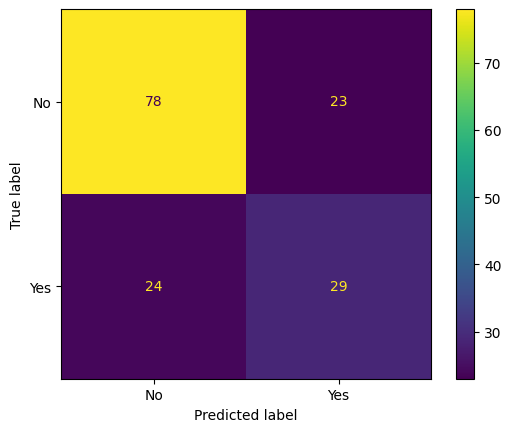

In [578]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No","Yes"])
print(cm)
cm_display.plot()
plt.show()

In [579]:
c_report = classification_report(y_test,y_predict,target_names=["No","Yes"])
print(c_report)

              precision    recall  f1-score   support

          No       0.76      0.77      0.77       101
         Yes       0.56      0.55      0.55        53

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



### - using RandomForest

In [580]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [581]:
df = pd.read_csv("./diabetes.csv")

In [582]:
features = list(df.iloc[0][0:8].index)
X = df[features]
y = df["Outcome"]
out_classes = y.unique()
print(features,out_classes,sep="\n")
    

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1 0]


In [583]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7777)

In [584]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [585]:
y_predict = model.predict(X_test)

In [586]:
print("Score is ", model.score(X_test,y_test))

Score is  0.7792207792207793


[[85 16]
 [18 35]]


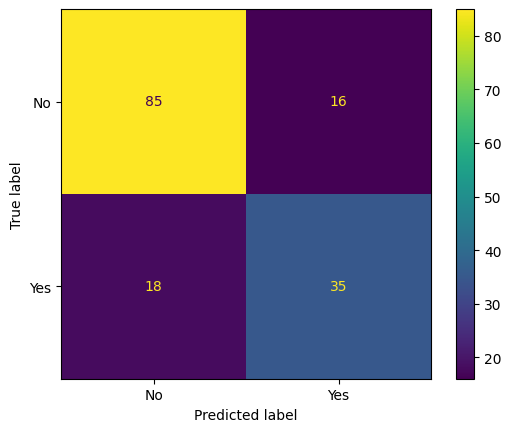

In [587]:
cm = confusion_matrix(y_test,y_predict)
print(cm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No","Yes"])
cm_display.plot()
plt.show()

In [588]:
c_report = classification_report(y_test,y_predict,target_names=["No","Yes"])
print(c_report)

              precision    recall  f1-score   support

          No       0.83      0.84      0.83       101
         Yes       0.69      0.66      0.67        53

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154



### สรุปผลเปรียบเทียบ Model Decision Tree และ Random Forest

จากผลการทดสอบโมเดลด้วยชุดข้อมูล Diabetes โดยแบ่ง test 20% ได้ผลดังนี้ 

เนื่องจากโมเดลจาก Decision Tree มีค่า precision (yes,no) 0.56, 0.76 ตามลำดับ บอกได้ว่า ค่าที่ทาย yes ถูกมีประมาณครึ่งนึงของที่ทาย yes และ no คิดเป็น 3/4 ของ no ทั้งหมด และค่า recall (yes,no) 0.55, 0.77 บอกได้ว่า ค่าที่ทาย yes ประมาณครึ่งหนึ่งของที่ทาย yes รวมกับค่าที่ทายผิดเป็นค่าอื่นและ no คิดเป็น 3/4 ของค่าที่ทาย no รวมกับทีทายผิดไปเป็นค่าอื่น
โมเดลมี accuracy ที่ 69% สามารถบอกได้ว่า
โมเดลนี้ทายค่า no ได้ค่อนข้างดีแต่ไม่ดีมาก แต่สามารถทายค่า yes ได้ไม่ค่อยดี โดยรวมประสิทธิภาพยังไม่ค่อยดี

เนื่องจากโมเดล Random Forest มีค่า precision (yes,no) 0.69, 0.83 ตามลำดับ บอกได้ว่า ค่าที่ทาย yes ถูกเกือบ 3/4 ของค่าที่ทาย yes ทั้งหมด และทายค่า no ถูกถึงประมาณ 4/5 ของค่าที่ทาย no ทั้งหมด และค่า recall (yes,no) 0.66, 0.84 บอกได้ว่า ค่าที่ทาย yes คิดเป็นไม่ถึง 3/4 ของที่ทาย yes รวมกับที่ทายผิดไปเป็นค่าอื่น และค่า no รวมกับค่าที่ทายผิดไปเป็นค่าอื่น ทายผิดไปเพียง 16% และมี accuracy ที่ 78% สามารถบอกได้ว่าโมเดลทายค่า no ได้ค่อนข้างแม่นยำแต่ทีผิดไปบ้างนิดหน่อย แต่ยังทายค่า yes ได้ไมม่ค่อยดี

สามารถสรุปผลได้ดังนี้ โมเดล 2 (Random Forest)มีประสิทธิภาพดีกว่า 1 (Decision Tree) เนื่องจากข้อมูล classification report จะเห็นได้ว่ามีการทำนาย precision และ recall ของทั้ง yes และ no ได้ดีกว่า model 1 ชัดเจน คือทายถูกในคลาสนั้นๆสูงกว่า และทายผิดไปเป็นคลาสอื่นน้อยกว่า สอดคล้องกับค่า accuracy